In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats


In [2]:
loandata = pd.read_csv('LoanData_prepared.csv')

In [3]:
df = pd.DataFrame(loandata)
df.shape

(241909, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241909 entries, 0 to 241908
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   AppliedAmount                      241909 non-null  float64
 1   DebtToIncome                       241909 non-null  float64
 2   AmountOfPreviousLoansBeforeLoan    241909 non-null  float64
 3   Country                            241909 non-null  object 
 4   Education                          241909 non-null  object 
 5   EmploymentDurationCurrentEmployer  241909 non-null  object 
 6   ExistingLiabilities                241909 non-null  int64  
 7   FreeCash                           241909 non-null  float64
 8   Gender                             241909 non-null  object 
 9   HomeOwnershipType                  241909 non-null  object 
 10  IncomeTotal                        241909 non-null  float64
 11  Interest                           2419

In [5]:
X = df.select_dtypes(include=[object])
X.head(3)

,Country,Education,EmploymentDurationCurrentEmployer,Gender,HomeOwnershipType,VerificationType,LanguageCode,Age_Group
0,EE,Vocational education,UpTo5Years,Female,Other,Income and expenses verified,Estonian,18-30
1,FI,Higher education,UpTo5Years,Female,Owner,Income and expenses verified,Finnish,31-40
2,EE,Higher education,UpTo5Years,Male,"Tenant, pre-furnished property",Income and expenses verified,Estonian,18-30


In [6]:
df = pd.get_dummies(df)
df['Country_EE'].head(3)

0     True
1    False
2     True
Name: Country_EE, dtype: bool

In [7]:
df.head()

,AppliedAmount,DebtToIncome,AmountOfPreviousLoansBeforeLoan,ExistingLiabilities,FreeCash,IncomeTotal,Interest,LiabilitiesTotal,LoanDuration,MonthlyPayment,...,LanguageCode_Finnish,LanguageCode_German,LanguageCode_Russian,LanguageCode_Slovakian,LanguageCode_Spanish,Age_Group_18-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61-70
0,3189.0,0.00,3402.0,0,0.00,900.0,35.48,0.00,60,115.34,...,False,False,False,False,False,True,False,False,False,False
1,4146.0,0.00,518.0,0,0.00,3100.0,19.86,0.00,60,108.17,...,True,False,False,False,False,False,True,False,False,False
2,531.0,0.00,1593.0,0,0.00,1700.0,19.52,0.00,60,15.25,...,False,False,False,False,False,True,False,False,False,False
3,2125.0,26.29,500.0,8,10.92,354.0,20.97,485.09,60,62.05,...,False,False,False,False,False,False,False,False,True,False
4,518.0,0.00,19283.0,0,0.00,4800.0,19.88,0.00,60,13.51,...,True,False,False,False,False,False,True,False,False,False


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241909 entries, 0 to 241908
Data columns (total 61 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   AppliedAmount                                                  241909 non-null  float64
 1   DebtToIncome                                                   241909 non-null  float64
 2   AmountOfPreviousLoansBeforeLoan                                241909 non-null  float64
 3   ExistingLiabilities                                            241909 non-null  int64  
 4   FreeCash                                                       241909 non-null  float64
 5   IncomeTotal                                                    241909 non-null  float64
 6   Interest                                                       241909 non-null  float64
 7   LiabilitiesTotal                               

In [53]:
def bias_test(data_frame, sensitive_attribute,Y, fav_label, Sp_label, Su_label):
    Sp = data_frame[data_frame[sensitive_attribute] == Sp_label]
    Fav_Sp = Sp[Sp[Y] == fav_label]
    Fav_Sp_Count = len(Fav_Sp)

    Su = data_frame[data_frame[sensitive_attribute] == Su_label]
    Fav_Su = Su[Su[Y] == fav_label]
    Fav_Su_Count = len(Fav_Su)

    Advantageous = len(Sp)
    dis_Advantageous = len(Su)

    statistical_parity = (Fav_Su_Count / dis_Advantageous) - (Fav_Sp_Count / Advantageous)
    disparate_impact = (Fav_Su_Count / dis_Advantageous) / (Fav_Sp_Count / Advantageous)

    return statistical_parity, disparate_impact

In [54]:
# 0 = (default = false), 1 = (default = true)
fav=0
unfav=1

In [55]:
a='Gender_Male' 
b='Gender_Female'
c='Gender_Undefined'
d='Country_EE'
e='Country_FI'
f='Country_ES'
g='Country_SK'
h='Age_Group_18-30'
i='Age_Group_31-40'
j='Age_Group_41-50'
k='Age_Group_51-60'
l='Age_Group_61-70'
m='Education_Basic education'
n='Education_Higher education'
o='Education_Primary education'
p='Education_Secondary education'
q='Education_Vocational education'
r='LanguageCode_Estonian'
s='LanguageCode_Finnish'
t='LanguageCode_Russian'
u='LanguageCode_Spanish'
v='LanguageCode_English'
w='LanguageCode_Slovakian'
x='LanguageCode_German'


In [56]:
label_names=['Default']

sensitive_attribute_names=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x]

privileged_groups = [{a :0}, {b :0}, {c :0}, {d :0}, {e :0}, {f :0}, {g :0}, {h :0}, {i :0}, {j :0},
                     {k :0}, {l :0}, {m :0}, {n :0}, {o :0}, {p :0}, {q :0}, {r :0}, {s :0}, {t :0},
                     {u :0}, {v :0}, {w :0}, {x :0}]


unprivileged_groups = [{a :1}, {b :1}, {c :1}, {d :1}, {e :1}, {f :1}, {g :1}, {h :1}, {i :1}, {j :1},
                       {k :1}, {l :1}, {m :1}, {n :1}, {o :1}, {p :1}, {q :1}, {r :1}, {s :1}, {t :1},
                       {u :1}, {v :1}, {w :1}, {x :1}]


input_dataframe = df.copy()
INPUT_DATAFRAME = input_dataframe
LABEL_NAMES = label_names
SENSITIVE_ATTRIBUTE_NAMES = sensitive_attribute_names
PRIVILEGED_GROUPS = privileged_groups
UNPRIVILEGED_GROUP = unprivileged_groups


SP=[]
DI=[]
Sensitive=[]
for groupe in range(0, len(sensitive_attribute_names)):
    sensitive_attribute_name = list(privileged_groups[groupe].keys())[0]
    privileged_group_sensitive_attribute_value = PRIVILEGED_GROUPS[groupe][sensitive_attribute_name]
    unprivileged_group_sensitive_attribute_value = UNPRIVILEGED_GROUP[groupe][sensitive_attribute_name]
    print(sensitive_attribute_name, privileged_group_sensitive_attribute_value, unprivileged_group_sensitive_attribute_value)
    
    stat_parity, disparate_impact = bias_test(df, sensitive_attribute_name, 'Default', fav,
              privileged_group_sensitive_attribute_value, unprivileged_group_sensitive_attribute_value)
    
    print("Statistical Parity Difference: ", stat_parity)
    print("Disparate Impact: ", disparate_impact)
    print(" ") #placeholder

    SP.append(stat_parity)
    DI.append(disparate_impact)
    Sensitive.append(sensitive_attribute_name)
    

Gender_Male 0 1
Statistical Parity Difference:  0.020482678637375407
Disparate Impact:  1.0360532929128283
 
Gender_Female 0 1
Statistical Parity Difference:  0.04493259800924543
Disparate Impact:  1.079642866935836
 
Gender_Undefined 0 1
Statistical Parity Difference:  -0.25945192384665317
Disparate Impact:  0.5649295908031532
 
Country_EE 0 1
Statistical Parity Difference:  0.17282040100653473
Disparate Impact:  1.348520767400201
 
Country_FI 0 1
Statistical Parity Difference:  -0.08197315756599721
Disparate Impact:  0.8661033773816473
 
Country_ES 0 1
Statistical Parity Difference:  -0.22831530324229615
Disparate Impact:  0.6241078385286593
 
Country_SK 0 1
Statistical Parity Difference:  0.40421185849385655
Disparate Impact:  1.6973268461496125
 
Age_Group_18-30 0 1
Statistical Parity Difference:  0.04661654956143746
Disparate Impact:  1.0820508892800016
 
Age_Group_31-40 0 1
Statistical Parity Difference:  0.019321608112609634
Disparate Impact:  1.0336528578061561
 
Age_Group_41-5

    #Statistical Parity Difference should be between -0.1 and 0.1
    <0 = priv has advantage, unpriv has diSpdvantage
    =0 = equal 
    >0 = priv has diSpdvantage, unpriv has advantage
    +
    Values less than 0 indicate that, privileged group has higher proportion of predicted positive outcomes than unprivileged group. 
    Value 0 indicates that, there is no difference between two groups
    Value higher than 0 indicates that unprivileged group has higher proportion of predicted positive outcomes than privileged group. 
    A negative value of statistical parity difference indicates that the unprivileged group is at a diSpdvantage and a positive value indicates that the privileged group is at a diSpdvantage. 


    #Disparate Impact should be between 1.00 and 1.10
    <1 = priv has advantage, unpriv has diSpdvantage
    =1 = equal
    >1 = priv has diSpdvantage, unpriv has advantage
    +
    Values less than 1 indicate that privileged group a has a higher proportion of predicted positive outcomes than unprivileged group. This is referred to as positive bias.
    A value of 1 indicates demographic parity.
    Values greater than 1 indicate that unprivileged group has a higher proportion of predicted positive outcomes than privileged group. This is referred to as negative bias.

In [57]:
SP, DI, Sensitive
df_bias = pd.DataFrame({'Sensitive_feature':Sensitive,'SPD_initial':SP,'DI_initial':DI})
df_bias['DI_normal']=df_bias["DI_initial"].apply(lambda x: 1/x if x < 1 else x)
df_bias['SPD_normal']=df_bias["SPD_initial"].apply(lambda x: abs(x) if x < 0 else x)

In [58]:
df_bias.head(25)

,Sensitive_feature,SPD_initial,DI_initial,DI_normal,SPD_normal
0,Gender_Male,0.020483,1.036053,1.036053,0.020483
1,Gender_Female,0.044933,1.079643,1.079643,0.044933
2,Gender_Undefined,-0.259452,0.564930,1.770132,0.259452
3,Country_EE,0.172820,1.348521,1.348521,0.172820
4,Country_FI,-0.081973,0.866103,1.154597,0.081973
5,Country_ES,-0.228315,0.624108,1.602287,0.228315
6,Country_SK,0.404212,1.697327,1.697327,0.404212
7,Age_Group_18-30,0.046617,1.082051,1.082051,0.046617
8,Age_Group_31-40,0.019322,1.033653,1.033653,0.019322
9,Age_Group_41-50,-0.011717,0.979894,1.020519,0.011717


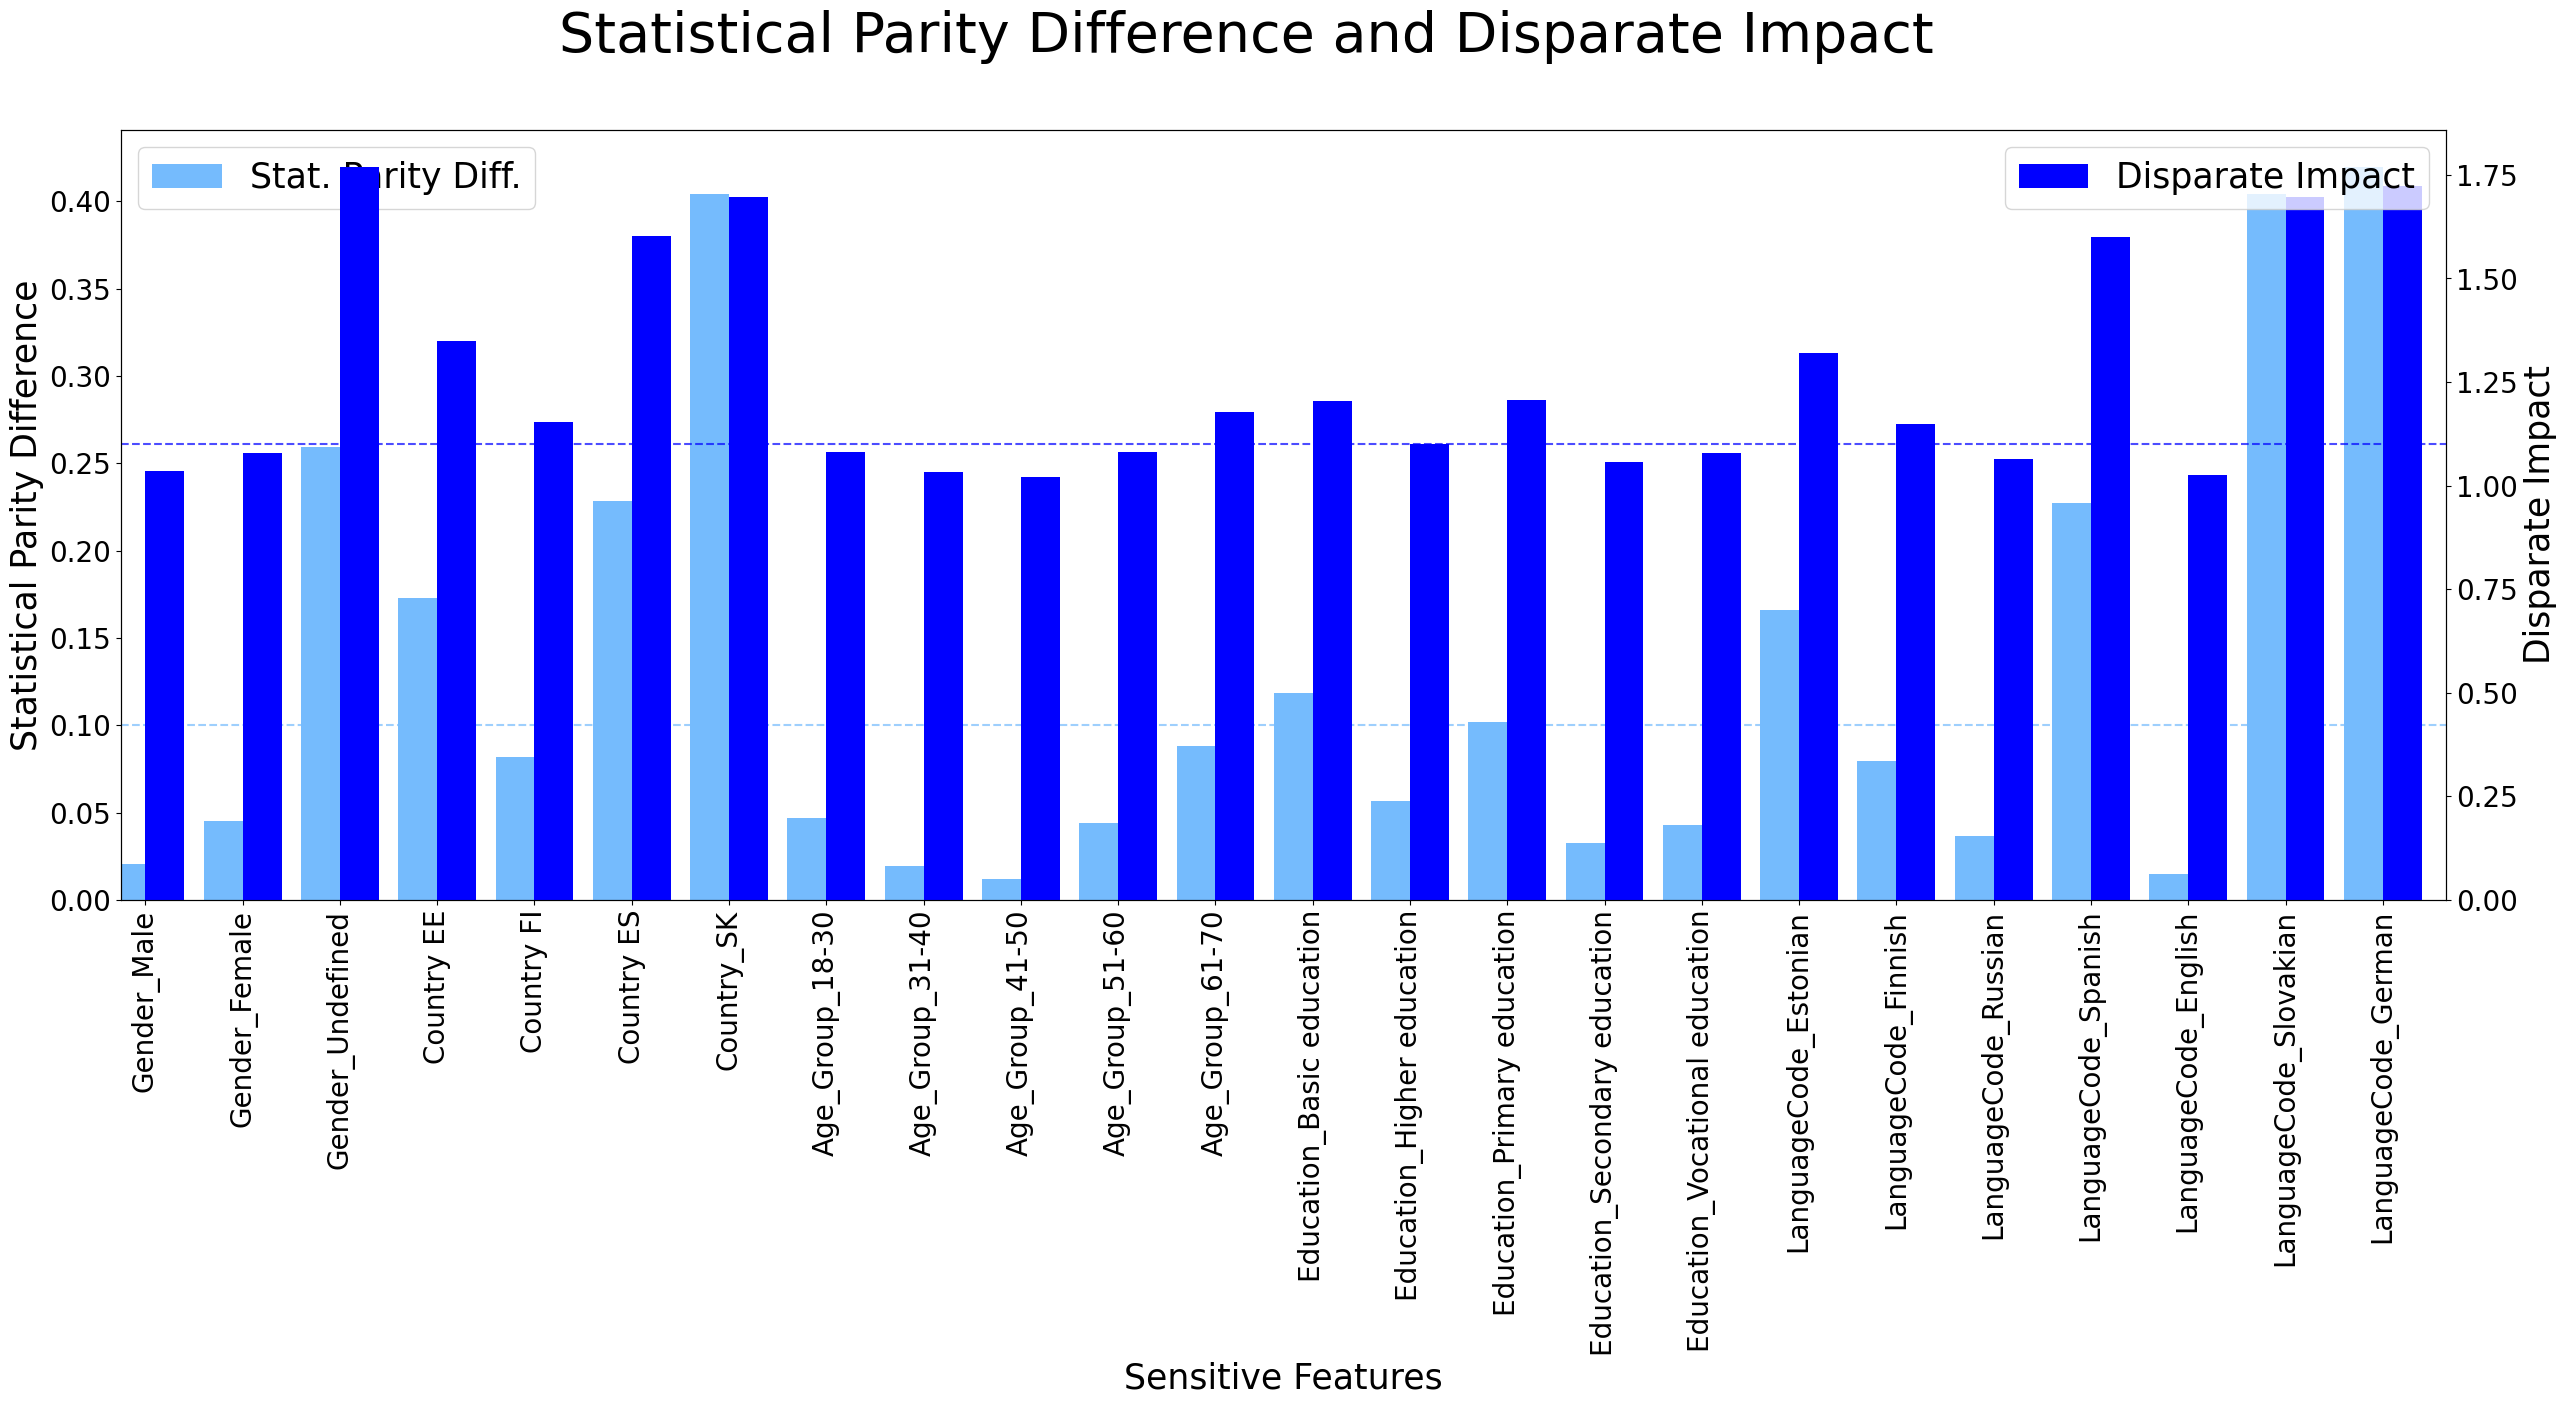

In [59]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.


fig.suptitle('Data bias', fontsize=40, y=1)


width = 0.4
df_bias.plot(x ='Sensitive_feature', y='SPD_normal', kind = 'bar', ax=ax, width=width, 
       position=1, color='xkcd:sky blue', legend=False, figsize=(30,10), fontsize=20)

df_bias.plot(x ='Sensitive_feature', y='DI_normal', kind = 'bar', ax=ax2, width=width, 
       position=0, color='blue', legend=False, figsize=(30,10), fontsize=20)

ax.axhline(y=0.1, linestyle='dashed', alpha=0.7, color='xkcd:sky blue') #SPD treshold
ax2.axhline(y=1.10, linestyle='dashed', alpha=0.7, color='blue')

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, ['Stat. Parity Diff.'], loc='upper left', fontsize=25)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, ['Disparate Impact'], loc='upper right', fontsize=25)



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Gender_Male'
labels[1] = 'Gender_Female'
labels[2] = 'Gender_Undefined'
labels[3] = 'Country EE'
labels[4] = 'Country FI'
labels[5] = 'Country ES'

labels[6]='Country_SK'
labels[7]='Age_Group_18-30'
labels[8]='Age_Group_31-40'
labels[9]='Age_Group_41-50'
labels[10]='Age_Group_51-60'
labels[11]='Age_Group_61-70'
labels[12]='Education_Basic education'
labels[13]='Education_Higher education'
labels[14]='Education_Primary education'
labels[15]='Education_Secondary education'
labels[16]='Education_Vocational education'
labels[17]='LanguageCode_Estonian'
labels[18]='LanguageCode_Finnish'
labels[19]='LanguageCode_Russian'
labels[20]='LanguageCode_Spanish'
labels[21]='LanguageCode_English'
labels[22]='LanguageCode_Slovakian'
labels[23]='LanguageCode_German'


ax.set_xticklabels(labels)

ax.set_xlabel('Sensitive Features', fontsize=25)

ax.set_ylabel('Statistical Parity Difference', fontsize=25)
ax2.set_ylabel('Disparate Impact', fontsize=25)

plt.show()


In [60]:
for groupe in range(0, len(sensitive_attribute_names)):
    sensitive_attribute_name = list(privileged_groups[groupe].keys())[0]

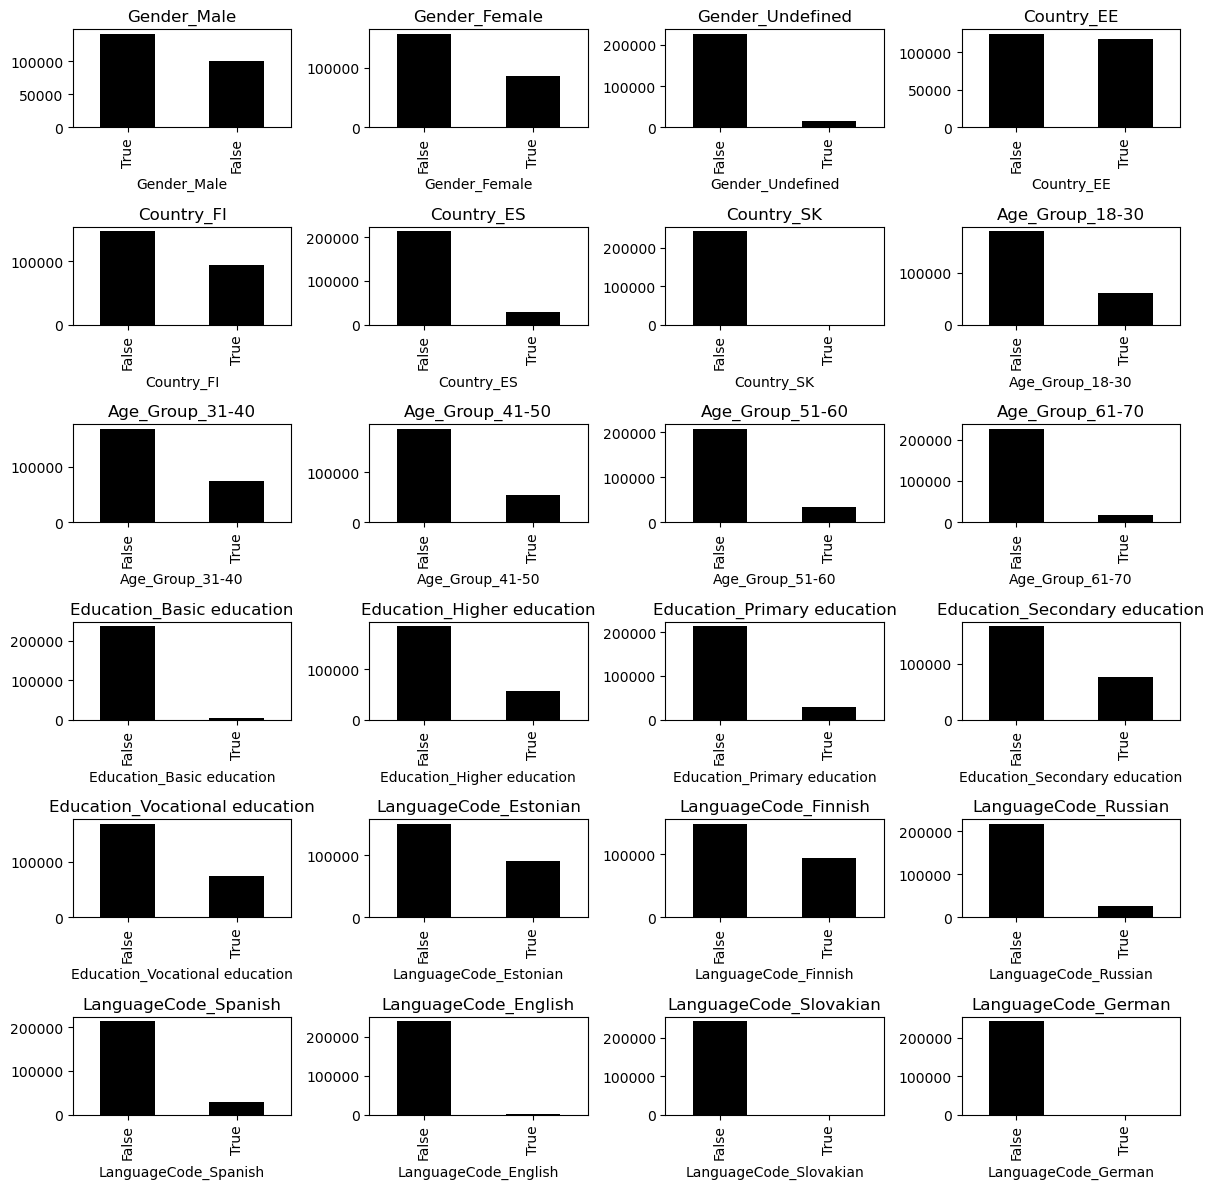

In [61]:
fig = plt.figure()

for groupe in range(0, len(sensitive_attribute_names)):

    sensitive_attribute_name = list(privileged_groups[groupe].keys())[0]

    ax = fig.add_subplot(6,4,groupe+1)

    vc=df[sensitive_attribute_name].value_counts()
    ax=vc.plot(kind='bar', figsize=(12,12), title=sensitive_attribute_name, color = 'blue')



plt.tight_layout()
plt.show()